# Import Packages #

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import PolynomialFeatures

try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ < '1.3.0'): #update for latest scikit-learn version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn
    
sns.set_theme()
print(pd.__version__)

/Users/edmondniu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


1.4.1.post1
2.2.1


# Import Data / Data Cleaning #

In [2]:
#import and clean datasets
advanced = pd.read_csv("advanced.csv", header = 1, index_col=1, parse_dates=False).iloc[1:].dropna(axis=1, how='all')
per_game = pd.read_csv('per_game.csv', index_col=1, parse_dates=False, dtype={'Road': str})
standings = pd.read_csv('standings.csv', header = 1, index_col=1, parse_dates=False, dtype={'Road': str})

#remove astericks in team names
per_game.index = per_game.index.str.replace(r'\*', '', regex=True)
advanced.index = advanced.index.str.replace(r'\*', '', regex=True)

#merge datasets
##TODO: merge datasets for all three
##TODO: rename columns in standings dataset. Add conference/division labels to colums
merged = pd.concat([standings, per_game, advanced], axis=1, join='outer')

## 1. Create Win Percentage ##

In [3]:
merged = merged.drop(merged.index[-1])
merged[['Win', 'Loss']] = merged['Overall'].str.split('-', expand=True).astype(int)
merged['WinLossPercentage'] = merged['Win']*100/(merged['Loss']+merged['Win'])
merged.head(5)
merged.loc[merged.index == 'Golden State Warriors', 'Road'] = '11-30'
merged.loc[merged.index == 'Houston Rockets', 'Road'] = '8-33'
merged.loc[merged.index == 'San Antonio Spurs', 'Road'] = '8-33'
merged.loc[merged.index == 'Detroit Pistons', 'Home'] = '9-32'
merged.loc[merged.index == 'Detroit Pistons', 'Road'] = '8-33'
#merged

## 2. Create Home and Away Win Percentage ##

In [4]:
merged[['Home_win', 'Home_loss']] = merged['Home'].str.split('-', expand=True).astype(int)
merged[['Away_win', 'Away_loss']] = merged['Road'].str.split('-', expand=True).astype(int)
merged['Home_WLP'] = merged['Home_win']*100/(merged['Home_win'] + merged['Home_loss'])
merged['Away_WLP'] = merged['Away_win']*100/(merged['Away_win'] + merged['Away_loss'])
merged['3_point_percentage'] = merged['3P%']*100
merged.head(5)

,Rk,Overall,Home,Road,E,W,A,C,SE,NW,...,Win,Loss,WinLossPercentage,Home_win,Home_loss,Away_win,Away_loss,Home_WLP,Away_WLP,3_point_percentage
Team,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks,1.0,58-24,32-9,26-15,35-17,23-7,6-Dec,5-Nov,6-Dec,1-Sep,...,58,24,70.731707,32,9,26,15,78.048780,63.414634,36.8
Boston Celtics,2.0,57-25,32-9,25-16,34-18,23-7,5-Nov,7-Nov,6-Dec,3-Jul,...,57,25,69.512195,32,9,25,16,78.048780,60.975610,37.7
Philadelphia 76ers,3.0,54-28,29-12,25-16,34-18,20-10,6-Oct,13-5,7-Nov,3-Jul,...,54,28,65.853659,29,12,25,16,70.731707,60.975610,38.7
Denver Nuggets,4.0,53-29,34-7,19-22,19-11,34-18,6-Apr,3-Jul,2-Aug,6-Oct,...,53,29,64.634146,34,7,19,22,82.926829,46.341463,37.9
Cleveland Cavaliers,5.0,51-31,31-10,20-21,34-18,17-13,10-Aug,13-3,13-5,6-Apr,...,51,31,62.195122,31,10,20,21,75.609756,48.780488,36.7


# Question 1 #
#### Q: The NBA has seen an increasing number of 3-pointers per game being attempted. Given this increase, we want to investigate whether teams should work on their accuracy of making 3 point shots. Is a higher 3-point field goal percentage correlated with a higher win rate for NBA basketball teams?

##### A: A greater 3-point field goal percentage affects the win odds for teams in an individual game.

In [5]:
data = merged

# Step 2: Prepare the data
X = data[['3_point_percentage']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
new_3P = np.array([[35]])  # Example 3P% value
predicted_pts = model.predict(new_3P)
print(f"Predicted win percentage for a 3-point percentage of 35%: {predicted_pts[0]}")

RMSE: 6.462901457526928
R-squared: 0.5649400054851862
Coefficient: 4.895390751774447
Intercept: -126.0329827777706
Predicted win percentage for a 3-point percentage of 35%: 45.305693534335035


/Users/edmondniu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


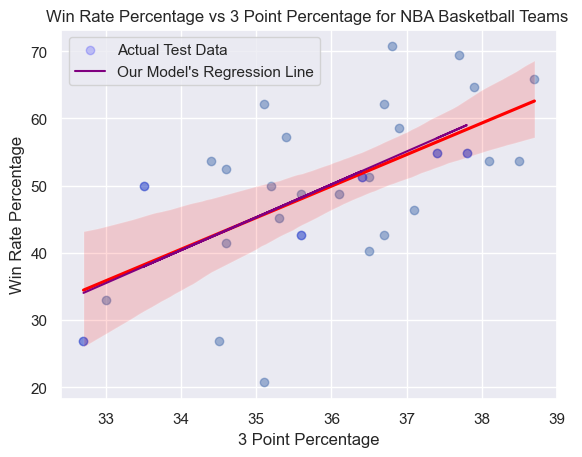

In [6]:
# Your code for preparing data and training the model goes here

# Plotting
sns.regplot(x='3_point_percentage', y='WinLossPercentage', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Scatter plot of the actual test data
plt.scatter(X_test, y_test, color='blue', alpha=0.2, label='Actual Test Data')

# Plotting the regression line with the predicted values for the test set
plt.plot(X_test, predictions, color='purple', label="Our Model's Regression Line")

# Annotations
plt.title('Win Rate Percentage vs 3 Point Percentage for NBA Basketball Teams ')
plt.xlabel('3 Point Percentage')
plt.ylabel('Win Rate Percentage')
plt.legend()
plt.show()

# Question 2: 
#### Q: Are NBA basketball teams more likely to win basketball games at “home” or “away”? Is there such a thing as “home-field advantage”?

##### A: Home field advantage has a significant effect on the win-rate of NBA teams (11-21% increase in win rate at home-field)


### 1. Hypothesis Test ###

1. Null Hypothesis: There is no difference in win percentage of games played at home vs away for NBA basketball teams in the 2022-2023 season.
2. Alternate Hypothesis: There is a discernible difference in win percentage of games played at home vs away for NBA basketball teams in the 2022-2023 season.
3. P-value = 0.0000435. Fail to reject the null hypothesis. There is convincing evidence that there is a discernible difference in win percentage of games played at home vs away for NBA basketball teams in the 2022-2023 season.

In [7]:
from scipy import stats

homeWLP = merged['Home_WLP']
awayWLP = merged['Away_WLP']

hWLP_aWLP = (merged['Home_WLP'] - merged['Away_WLP'])
hWLP_aWLP_list = hWLP_aWLP.tolist()

stats.ttest_ind(homeWLP.tolist(), awayWLP.tolist())

TtestResult(statistic=4.422537243822545, pvalue=4.3475370182099444e-05, df=58.0)

### 2. Bootstrap ####
#####
1. We can be 95% confident that the true win percentage of away games of NBA basketball teams in the 2022-2023 season is between 38% and 46% 
2. We can be 95% confident that the true win percentage of home games of NBA basketball teams in the 2022-2023 season is between 53% and 64%
#####


95% Confidence Interval (Away Games): (37.72357723577236, 46.34146341463415)
95% Confidence Interval (Home Games): (52.52032520325203, 63.57723577235772)


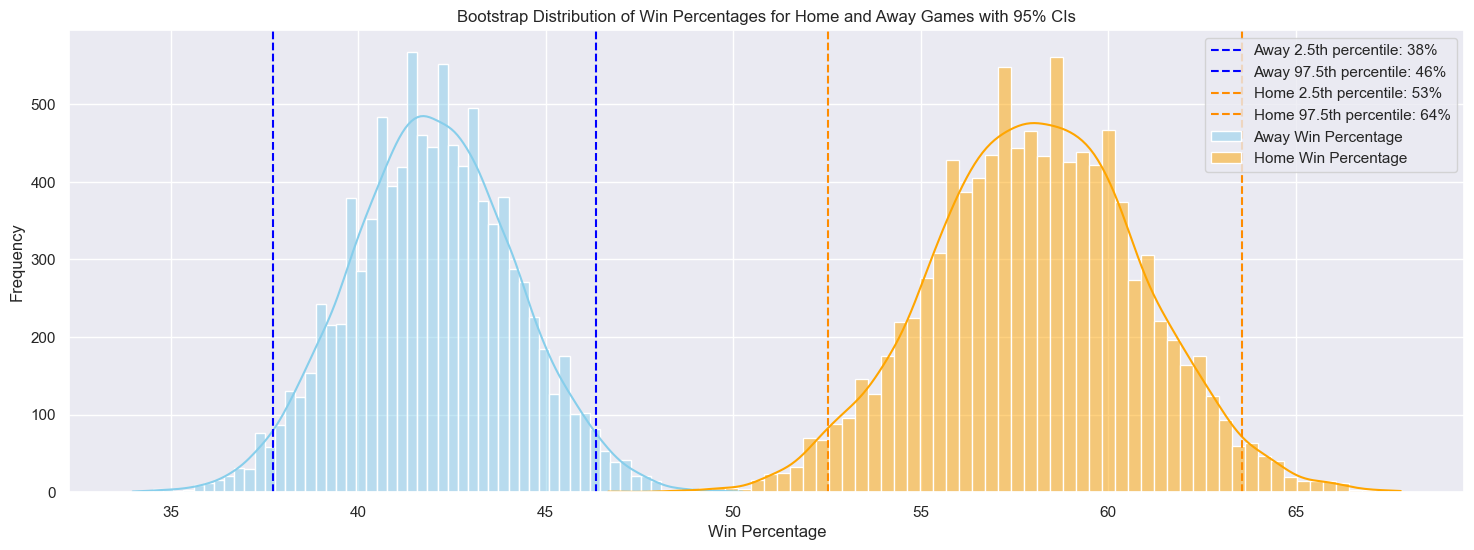

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming awayWLP and homeWLP are defined and contain the away and home win percentage data respectively

# Set the seed for reproducibility
np.random.seed(10)

# For away win percentage
sample_away = awayWLP.values
bootstrap_samples_away = np.random.choice(sample_away, size=(10000, len(sample_away)), replace=True)
sampling_means_away = np.average(bootstrap_samples_away, axis=1)

# For home win percentage
sample_home = homeWLP.values
bootstrap_samples_home = np.random.choice(sample_home, size=(10000, len(sample_home)), replace=True)
sampling_means_home = np.average(bootstrap_samples_home, axis=1)

# Create Series from the means
sampling_means_series_away = pd.Series(sampling_means_away)
sampling_means_series_home = pd.Series(sampling_means_home)

plt.figure(figsize=(18, 6))  # Width is 18 inches and height is 6 inches

# Plot the distributions
sns.histplot(sampling_means_series_away, kde=True, color='skyblue', label='Away Win Percentage')
sns.histplot(sampling_means_series_home, kde=True, color='orange', label='Home Win Percentage')

# Confidence intervals for away
bootstrap_ci_l_away = np.percentile(sampling_means_away, 2.5)
bootstrap_ci_r_away = np.percentile(sampling_means_away, 97.5)
bootstrap_ci_away = tuple([bootstrap_ci_l_away, bootstrap_ci_r_away])
print("95% Confidence Interval (Away Games): " + str(bootstrap_ci_away))

# Confidence intervals for home
bootstrap_ci_l_home = np.percentile(sampling_means_home, 2.5)
bootstrap_ci_r_home = np.percentile(sampling_means_home, 97.5)
bootstrap_ci_home = tuple([bootstrap_ci_l_home, bootstrap_ci_r_home])
print("95% Confidence Interval (Home Games): " + str(bootstrap_ci_home))


# Add CI lines for away
plt.axvline(bootstrap_ci_l_away, color='blue', linestyle='--', label='Away 2.5th percentile: 38%')
plt.axvline(bootstrap_ci_r_away, color='blue', linestyle='--', label='Away 97.5th percentile: 46%')

# Add CI lines for home
plt.axvline(bootstrap_ci_l_home, color='darkorange', linestyle='--', label='Home 2.5th percentile: 53%')
plt.axvline(bootstrap_ci_r_home, color='darkorange', linestyle='--', label='Home 97.5th percentile: 64%')

# Add legend and labels
plt.legend()
plt.xlabel('Win Percentage')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of Win Percentages for Home and Away Games with 95% CIs')

# Show the plot with both distributions
plt.show()


# Question 3
#### Q: How do other team-related performance ratings (offensive ratings, defensive ratings, turnover percentage, etc.) affect the outcome of an NBA basketball game? 

##### A: A team's Simple Rating Score (SRS) and Net Rating (NRtg: Offensive + Defensive Rating combined) affect the outcome the game.

### Random Forest SRS NRTG with 5-fold cross validation ###
##### Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
##### RMSE: 0.10574056628191948

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

data = merged  # assuming 'merged' is your DataFrame

# Prepare the data
X = data[['SRS', 'NRtg']]  # Predictor variables
y = data['WinLossPercentage']  # Response variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_rf.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, predictions)
print(f"R squared: {r2}")

# Get feature importance
importances = best_rf.feature_importances_
print(f"Feature Importances: {importances}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/edmondniu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/edmondniu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/edmondniu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/edmondniu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/edmondniu/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWar

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 2.9214561536847032
R squared: 0.9111018287435437
Feature Importances: [0.54009429 0.45990571]


### Top 3 Rsquared ###

In [10]:
data = merged

# Step 2: Prepare the data
X = data[['DRtg', 'SRS', 'NRtg']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 3.470349552882498
R-squared: 0.8745587061312551
Coefficient: -0.1452640548153662
Intercept: 67.06025139421207


### Top 3 with k fold cross validation ###

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

# Load your data - replace this with your actual data loading step
data = merged

# Define predictor and response variables
X = data[['DRtg', 'SRS', 'NRtg']]
y = data['WinLossPercentage']

# Apply polynomial transformation if needed
poly = PolynomialFeatures(1, include_bias=False)
poly_X = poly.fit_transform(X)

model = LinearRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, poly_X, y, cv=5, scoring='r2')  # Use R^2 as the scoring method

print("Cross-validated R^2 scores:", scores)
print("Average R^2 score:", np.mean(scores))
print("Standard deviation of R^2 scores:", np.std(scores))

Cross-validated R^2 scores: [-2.93348588  0.18951137 -5.6888261  -1.84595255  0.57143211]
Average R^2 score: -1.9414642083286737
Standard deviation of R^2 scores: 2.275594666140586


### Defensive Rating only R-squared: 0.41 ###

In [12]:
data = merged

# Step 2: Prepare the data
X = data[['DRtg']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
off_def = np.array([[111.5]])  # Example 3P% value
predicted_pts = model.predict(off_def)
print(f"Predicted Win/Loss Percent for defense: 111.5: {predicted_pts[0]}")

RMSE: 5.2673932206499305
R-squared: 0.711008171595721
Coefficient: -3.8491166289841754
Intercept: 492.6915971374646
Predicted Win/Loss Percent for defense: 111.5: 63.51509300572906


/Users/edmondniu/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Offensive Rating only: R-squared: -0.144 ###

In [13]:
data = merged

# Step 2: Prepare the data
X = data[['ORtg']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0]])  # Example 3P% value
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offensive: 118.0: {predicted_pts[0]}")

RMSE: 5.695905088802006
R-squared: 0.662075585613555
Coefficient: 3.736501079913609
Intercept: -378.6355159879895


### Offensive and Defensive Rating R-squared: 0.44 ###

In [14]:
data = merged

# Step 2: Prepare the data
X = data[['ORtg', 'DRtg']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
predicted_pts = model.predict(off_def)
print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 3.4641417233872827
R-squared: 0.8750070884391242
Coefficient: 2.9042983711848365
Intercept: 61.26923225822913
Predicted Win/Loss Percent for offense: 118, defense: 111.5: 69.61541011976836


### SRS R-squared: 0.49 ###

In [15]:
data = merged

# Step 2: Prepare the data
X = data[['SRS']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 3.4996355679399564
R-squared: 0.8724325937619011
Coefficient: 3.0346749440600944
Intercept: 50.51586287514208


### NRtg: R-squared: 0.45 ###

In [16]:
data = merged

# Step 2: Prepare the data
X = data[['NRtg']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 3.428621730824907
R-squared: 0.8775572067085717
Coefficient: 2.950541362302527
Intercept: 50.41960261510763


### TSpercent: R-squared: -0.178 ###

In [17]:
data = merged

# Step 2: Prepare the data
X = data[['TS%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 9.11005853940775
R-squared: 0.13555688994021609
Coefficient: 536.4112534641112
Intercept: -262.09355639065024


### FTr R-squared: -0.015 ####

In [18]:
data = merged

# Step 2: Prepare the data
X = data[['FTr']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 10.206618225805599
R-squared: -0.08507016611604357
Coefficient: -59.9792861367994
Intercept: 66.87496113013171


### 3PAr R-squared: 0.08 ###

In [19]:
data = merged

# Step 2: Prepare the data
X = data[['3PAr']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 9.676737926276017
R-squared: 0.024668972429098934
Coefficient: 87.95530902181575
Intercept: 16.1586163754859


### Field Goal percentage R-squared: -0.22 ###

In [20]:
data = merged

# Step 2: Prepare the data
X = data[['FG%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 9.444113983675312
R-squared: 0.0709982717228218
Coefficient: 624.2124872244977
Intercept: -246.44218005695137


### 3P%: R-squared: -0.010 ###

In [21]:
data = merged

# Step 2: Prepare the data
X = data[['3P%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 6.4629014575269235
R-squared: 0.5649400054851867
Coefficient: 489.53907517744517
Intercept: -126.03298277777077


### 2P%: R-squared: -0.18 ###

In [22]:
data = merged

# Step 2: Prepare the data
X = data[['2P%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 11.971592020319026
R-squared: -0.4927871845191856
Coefficient: 480.4795040381017
Intercept: -213.95121857424772


### FT% R-squared: -0.213 ###

In [23]:
data = merged

# Step 2: Prepare the data
X = data[['FT%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 9.861007011137195
R-squared: -0.012830140689680025
Coefficient: 65.0382137130977
Intercept: -0.0008062588476605015


### 3P, 2P, FT % R-squared: -0.07 ###

In [24]:
data = merged

# Step 2: Prepare the data
X = data[['FT%', '3P%', '2P%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
#poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the model
model = LinearRegression()

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)  # This is how you calculate R-squared
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")  # Print the R-squared value


# Coefficients and Intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predicting with a new 3P% value
#off_def = np.array([[118.0,111.5]])  # Example 3P% value
#off_def = PolynomialFeatures(3, include_bias=False).fit_transform(off_def)
#predicted_pts = model.predict(off_def)
#print(f"Predicted Win/Loss Percent for offense: 118, defense: 111.5: {predicted_pts[0]}")

RMSE: 9.431542111669764
R-squared: 0.07346997360761176
Coefficient: 40.27188953834502
Intercept: -266.9146328139593


### LASSO CV MODEL:  FT, 3P, 2P Lasso R-squared: 0.144 ###

In [25]:
from sklearn.linear_model import LassoCV

data = merged

# Step 2: Prepare the data
X = data[['FT%', '3P%', '2P%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
#poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the LassoCV model
lasso = LassoCV(cv=5, random_state=42)

# Train the model
lasso.fit(X_train, y_train)

# Evaluate the model
lasso_predictions = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_predictions)

print(f"Lasso RMSE: {lasso_rmse}")
print(f"Lasso R-squared: {lasso_r2}")

Lasso RMSE: 9.405470761667518
Lasso R-squared: 0.07858525626106327


### Random Forest: FT, 3P, 2P RMSE: 0.48330224154176904 ###

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = merged

# Step 2: Prepare the data
X = data[['FT%', '3P%', '2P%']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
#poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Sample data preparation
# X and y should already be defined as your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Get feature importance
importances = rf.feature_importances_
print(f"Feature Importances: {importances}")

RMSE: 15.574379533021167
Feature Importances: [0.21770715 0.21120574 0.57108711]


### Random Forest: SRS, NRtg, RMSE: 0.323 ###

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = merged

# Step 2: Prepare the data
X = data[['SRS', 'NRtg']]  # Predictor variable (reshape for a single feature)
y = data['WinLossPercentage']  # Response variable
#poly_X = PolynomialFeatures(1, include_bias=False).fit_transform(X)

# Sample data preparation
# X and y should already be defined as your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
predictions = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, predictions)
print(f"R squared: {r2}")

# Get feature importance
importances = rf.feature_importances_
print(f"Feature Importances: {importances}")

RMSE: 3.1248002117376528
R squared: 0.8982958691910514
Feature Importances: [0.55952134 0.44047866]


### Random Forest SRS NRTG with 5-fold cross validation ###
##### Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
##### RMSE: 0.10574056628191948

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

data = merged  # assuming 'merged' is your DataFrame

# Prepare the data
X = data[['SRS', 'NRtg']]  # Predictor variables
y = data['WinLossPercentage']  # Response variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # minimum number of samples required to be at a leaf node
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_rf.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, predictions)
print(f"R squared: {r2}")

# Get feature importance
importances = best_rf.feature_importances_
print(f"Feature Importances: {importances}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 2.9214561536847032
R squared: 0.9111018287435437
Feature Importances: [0.54009429 0.45990571]
